In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import numpy as np
from IPython.display import display

df = pd.read_csv('dataset/survey_results_public.csv', sep=',')
display(df.info())
display(df.describe())


C:\Users\tomma\AppData\Local\Temp\ipykernel_11616\119758007.py:8: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('dataset/survey_results_public.csv', sep=',')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98855 entries, 0 to 98854
Columns: 129 entries, Respondent to SurveyEasy
dtypes: float64(41), int64(1), object(87)
memory usage: 97.3+ MB


None

,Respondent,AssessJob1,AssessJob2,AssessJob3,AssessJob4,AssessJob5,AssessJob6,AssessJob7,AssessJob8,AssessJob9,...,JobEmailPriorities6,JobEmailPriorities7,ConvertedSalary,AdsPriorities1,AdsPriorities2,AdsPriorities3,AdsPriorities4,AdsPriorities5,AdsPriorities6,AdsPriorities7
count,98855.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,66985.000000,...,46213.00000,46213.000000,4.770200e+04,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000,60479.000000
mean,50822.971635,6.397089,6.673524,5.906875,4.065791,3.953243,4.407196,5.673181,4.225200,7.640009,...,4.97425,4.836388,9.578086e+04,2.726880,3.805784,3.340945,3.782470,4.383604,5.138809,4.821459
std,29321.650410,2.788428,2.531202,2.642734,2.541196,2.520499,2.502069,2.923998,2.507411,2.407457,...,1.86063,1.659844,2.023482e+05,1.881078,1.821323,1.673485,1.844864,1.931746,1.853249,1.874895
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.00000,1.000000,0.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,25443.500000,4.000000,5.000000,4.000000,2.000000,2.000000,2.000000,3.000000,2.000000,6.000000,...,4.00000,4.000000,2.384400e+04,1.000000,2.000000,2.000000,2.000000,3.000000,4.000000,3.000000
50%,50823.000000,7.000000,7.000000,6.000000,4.000000,3.000000,4.000000,6.000000,4.000000,8.000000,...,5.00000,5.000000,5.507500e+04,2.000000,4.000000,3.000000,4.000000,5.000000,6.000000,5.000000
75%,76219.500000,9.000000,9.000000,8.000000,6.000000,6.000000,6.000000,8.000000,6.000000,10.000000,...,7.00000,6.000000,9.300000e+04,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000
max,101592.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,...,7.00000,7.000000,2.000000e+06,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000


In [2]:
columns=['Hobby','OpenSource','Country','Employment',\
    'FormalEducation','UndergradMajor','JobSatisfaction','ConvertedSalary']

data=df.get(columns).dropna()
data.head()


,Hobby,OpenSource,Country,Employment,FormalEducation,UndergradMajor,JobSatisfaction,ConvertedSalary
1,Yes,Yes,United Kingdom,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...",Moderately dissatisfied,70841.0
4,Yes,No,South Africa,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Slightly satisfied,21426.0
5,Yes,No,United Kingdom,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",Moderately satisfied,41671.0
6,Yes,Yes,United States,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...",Slightly satisfied,120000.0
8,Yes,Yes,United States,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,Moderately satisfied,250000.0


In [3]:
js_dict = {
    'Extremely dissatisfied':0,
    'Moderately dissatisfied':1,
    'Slightly dissatisfied':2,
    'Neither satisfied nor dissatisfied':3,
    'Slightly satisfied':4,
    'Moderately satisfied':5,
    'Extremely satisfied':6,
}

data['JobSatisfaction']=data['JobSatisfaction'].map(js_dict)

In [4]:
data = data.replace('Bachelor’s degree (BA, BS, B.Eng., etc.)',"Bachelor")
data = data.replace('Master’s degree (MA, MS, M.Eng., MBA, etc.)',"Master")
data = data.replace('Other doctoral degree (Ph.D, Ed.D., etc.)',"Ph.D")
data = data[data['FormalEducation'].isin(['Bachelor','Master','Ph.D'])]

In [5]:
countries=data.groupby('Country').size().sort_values()[-3:].index.tolist()
data = data[data['Country'].isin(countries)]

Country  Employment  FormalEducation  \
ConvertedSalary   JobSatisfaction                                         
0-250.000         0                    494         494              494   
                  1                   1371        1371             1371   
                  2                   1547        1547             1547   
                  3                    858         858              858   
                  4                   2014        2014             2014   
                  5                   5587        5587             5587   
                  6                   2976        2976             2976   
1.000.000+        0                     14          14               14   
                  1                     30          30               30   
                  2                     24          24               24   
                  3                     19          19               19   
                  4                     32          32               32   
                  5                     96          96               96   
                  6                     68          68               68   
250.000-1.000.000 0                     18          18               18   
                  1                     60          60               60   
                  2                     53          53               53   
                  3                     29          29               29   
                  4                     51          51               51   
                  5                    190         190              190   
                  6                    128         128              128   

                                   Hobby  OpenSource  UndergradMajor  
ConvertedSalary   JobSatisfaction                                     
0-250.000         0                  494         494             494  
                  1                 1371        1371            1371  
                  2                 1547        1547            1547  
                  3                  858         858             858  
                  4                 2014        2014            2014  
                  5                 5587        5587            5587  
                  6                 2976        2976            2976  
1.000.000+        0                   14          14              14  
                  1                   30          30              30  
                  2                   24          24              24  
                  3                   19          19              19  
                  4                   32          32              32  
                  5                   96          96              96  
                  6                   68          68              68  
250.000-1.000.000 0                   18          18              18  
                  1                   60          60              60  
                  2                   53          53              53  
                  3                   29          29              29  
                  4                   51          51              51  
                  5                  190         190             190  
                  6                  128         128             128

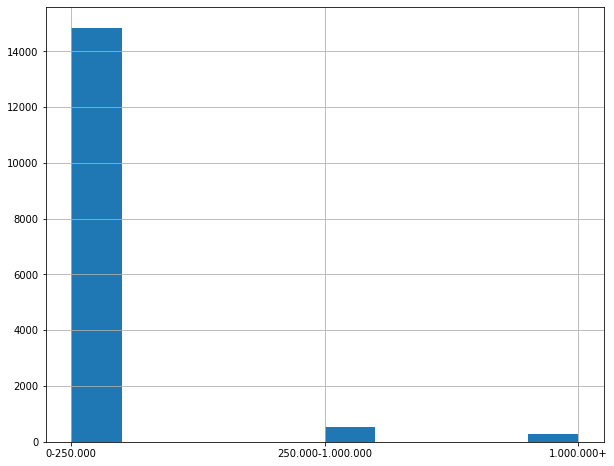

In [6]:
plt.figure(figsize=(10,8))
data.ConvertedSalary=data.ConvertedSalary.map(lambda x: '0-250.000' if x<=250000 else '250.000-1.000.000' if x<=1000000 else '1.000.000+')
data.ConvertedSalary.hist()
pd.pivot_table(data,index=['ConvertedSalary','JobSatisfaction'],aggfunc='count')


In [7]:
stem=['A natural science (ex. biology, chemistry, physics)',
 'Computer science, computer engineering, or software engineering',
 'Web development or web design',
 'Another engineering discipline (ex. civil, electrical, mechanical)',
 'Mathematics or statistics',
 'Information systems, information technology, or system administration',
]

not_stem=[ 'A social science (ex. anthropology, psychology, political science)',
 'A humanities discipline (ex. literature, history, philosophy)',
 'A business discipline (ex. accounting, finance, marketing)',
 'Fine arts or performing arts (ex. graphic design, music, studio art)',
 'A health science (ex. nursing, pharmacy, radiology)',
]

data=data[data['UndergradMajor'].isin(stem+not_stem)]
data.UndergradMajor=data.UndergradMajor.map(lambda x: 'STEM' if x in stem else 'NOT_STEM')
#'I never declared a major' WHERE DO THEY GO? 

#Just Delete them <------


In [8]:
display(data.head())
for col in data.columns: 
    print(col,data[col].unique())

,Hobby,OpenSource,Country,Employment,FormalEducation,UndergradMajor,JobSatisfaction,ConvertedSalary
1,Yes,Yes,United Kingdom,Employed full-time,Bachelor,STEM,1,0-250.000
5,Yes,No,United Kingdom,Employed full-time,Bachelor,STEM,5,0-250.000
22,No,No,United Kingdom,Employed full-time,Bachelor,STEM,4,0-250.000
24,Yes,No,India,Employed full-time,Master,STEM,5,0-250.000
27,No,No,United States,Employed full-time,Bachelor,NOT_STEM,5,250.000-1.000.000


Hobby ['Yes' 'No']
OpenSource ['Yes' 'No']
Country ['United Kingdom' 'India' 'United States']
Employment ['Employed full-time' 'Employed part-time'
 'Independent contractor, freelancer, or self-employed']
FormalEducation ['Bachelor' 'Master' 'Ph.D']
UndergradMajor ['STEM' 'NOT_STEM']
JobSatisfaction [1 5 4 0 6 2 3]
ConvertedSalary ['0-250.000' '250.000-1.000.000' '1.000.000+']


In [9]:
def chi2_contingency_mat(data,alpha=None):
    s=data.columns.size
    a = 0
    b = 0
    mat=np.zeros((s,s))
    for i in data.columns:
        for j in data.columns:
            contigency_pct = pd.crosstab(data[i], data[j])
            c, p, dof, expected = chi2_contingency(contigency_pct)
            mat[a][b]=p
            b=b+1
        a = a+1
        b=0
    if alpha:
        mat[mat>=alpha]=1
        mat[mat<alpha]=0
    return mat

def chi2_contingency_dict(data,alpha=None):
    s=data.columns.size
    a = 0
    b = 0
    mat={}
    for i in data.columns:
        mat[i] = {}

    
    for i in data.columns:
        for j in data.columns:
            contigency_pct = pd.crosstab(data[i], data[j])
            c, p, dof, expected = chi2_contingency(contigency_pct)
            mat[i][j]=p
    # if alpha:
    #     mat[mat>=alpha]=1
    #     mat[mat<alpha]=0
    return mat

In [10]:
list(data.columns)

['Hobby',
 'OpenSource',
 'Country',
 'Employment',
 'FormalEducation',
 'UndergradMajor',
 'JobSatisfaction',
 'ConvertedSalary']

<AxesSubplot:>

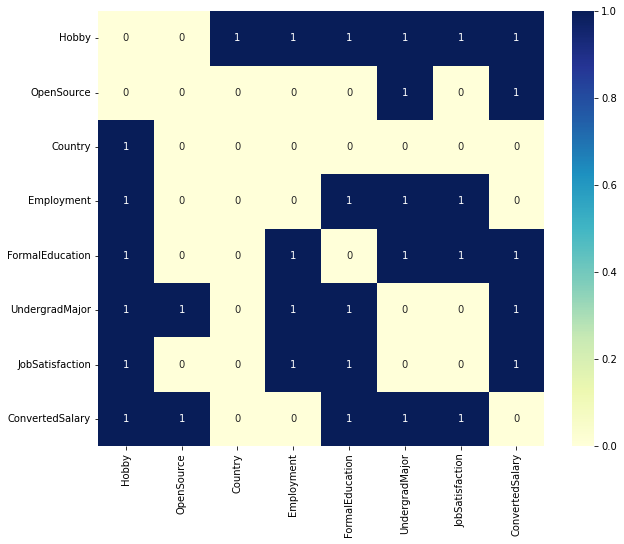

In [11]:
chi2Mat=chi2_contingency_mat(data,5e-7)
labels = list(data.columns)
plt.figure(figsize=(10,8))
sns.heatmap(chi2Mat,annot=True, xticklabels=labels, yticklabels=labels,cmap="YlGnBu")

In [12]:
chi2Mat=chi2_contingency_dict(data,5e-7)
plt.figure(figsize=(10,8))
# sns.heatmap(chi2Mat,annot=True)
# print(chi2Mat)

<Figure size 720x576 with 0 Axes>

<Figure size 720x576 with 0 Axes>

<AxesSubplot:>

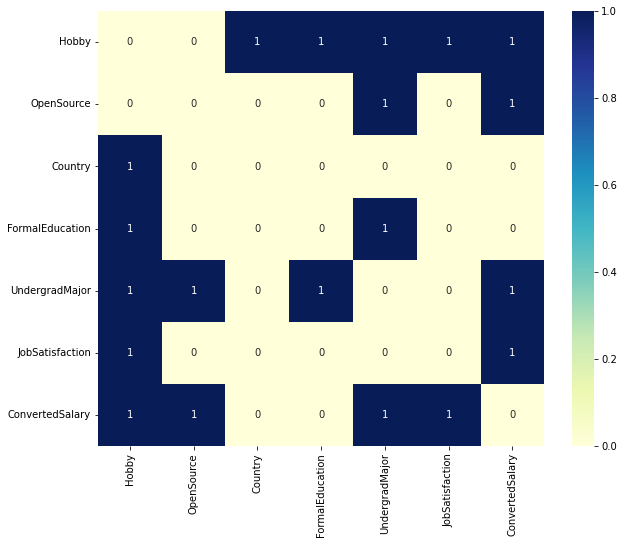

In [13]:
data = data.drop('Employment', axis=1)
chi2Mat=chi2_contingency_mat(data,5e-3)
labels = list(data.columns)
plt.figure(figsize=(10,8))
sns.heatmap(chi2Mat,annot=True, xticklabels=labels, yticklabels=labels,cmap="YlGnBu")

## GRAPH PLOTTING

In [14]:
def compute_graph_table(data, chi2Mat):

    graph_table = pd.DataFrame()


    source = []
    target=[]

    a=1
    for i in range(data.columns.size):
        for j in range(a, data.columns.size):
            if chi2Mat[i][j]==0:
                source.append(data.columns[i])
                target.append(data.columns[j])
        a=a+1

    type=['Unidirected' for i in range(len(source))]
    weight=[None for i in range(len(source))]
    graph_table['Source']=source
    graph_table['Target']=target
    graph_table['Type']=type
    graph_table['weight']=weight
    return graph_table


In [15]:
graph_table = compute_graph_table(data, chi2Mat)
graph_table

,Source,Target,Type,weight
0,Hobby,OpenSource,Unidirected,None
1,OpenSource,Country,Unidirected,None
2,OpenSource,FormalEducation,Unidirected,None
3,OpenSource,JobSatisfaction,Unidirected,None
4,Country,FormalEducation,Unidirected,None
5,Country,UndergradMajor,Unidirected,None
6,Country,JobSatisfaction,Unidirected,None
7,Country,ConvertedSalary,Unidirected,None
8,FormalEducation,JobSatisfaction,Unidirected,None
9,FormalEducation,ConvertedSalary,Unidirected,None


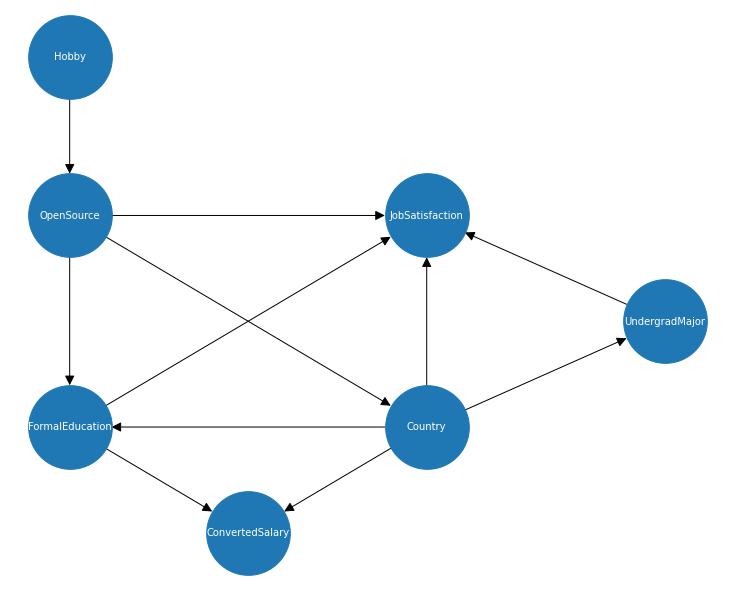

In [16]:
import networkx as nx

G = nx.from_pandas_edgelist(graph_table, source='Source', target='Target',create_using=nx.DiGraph())
# net = Network(notebook=True, directed=True)
# net.from_nx(G)
# net.show('nx.html')
pos={'Hobby':(0.5,10),
     'JobSatisfaction':(2,7),
     'OpenSource':(0.5,7),
     'FormalEducation':(0.5,3),
     'Country':(2,3),
     'ConvertedSalary':(1.25,1),
     'UndergradMajor':(3,5)
 }
plt.figure(figsize=(10,8))

nx.draw(G, arrows=True, with_labels=True, node_size=7000, arrowsize=20, pos=pos, font_size=10, font_color='white')
# print(G.edges())

## Markov Blanket Plotting

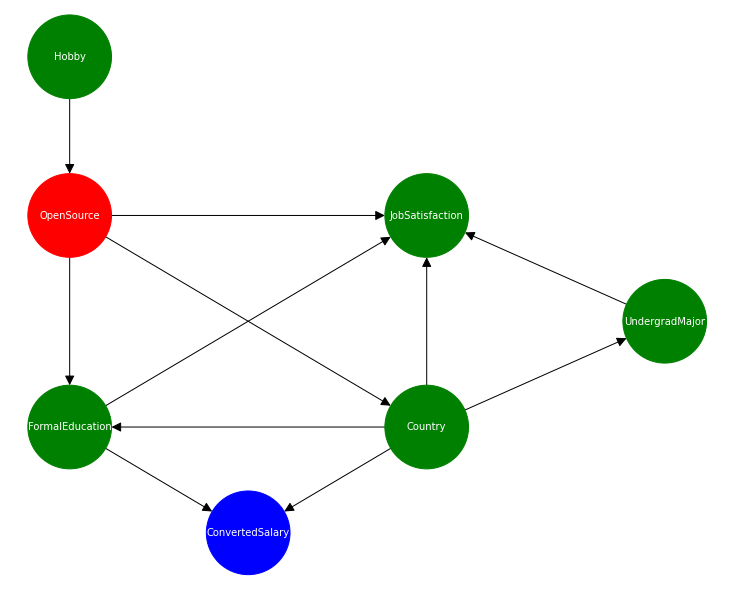

In [17]:
#Function to extract the Markov Blanket of a Node from the Graph
def get_mb(graph, node):
    mb = set()
    parents = [i for i in graph.predecessors(node)]
    mb.update(parents)
    sons = [i for i in graph.successors(node)]
    mb.update(sons)
    sons_parents=[]
    for s in sons:
        sons_parents.extend([i for i in graph.predecessors(s) if i != node])

    mb.update(sons_parents)
    return mb

#Markov Blanket Plotting Function
def plot_mb(G, mb, node):
    pos={'Hobby':(0.5,10),
     'JobSatisfaction':(2,7),
     'OpenSource':(0.5,7),
     'FormalEducation':(0.5,3),
     'Country':(2,3),
     'ConvertedSalary':(1.25,1),
     'UndergradMajor':(3,5)
    }
    plt.figure(figsize=(10,8))
    color_map=[]
    for n in G:
        if n in mb:
            color_map.append('green')
        elif n == node:
            color_map.append('red')
        else: 
            color_map.append('blue')  
    nx.draw(G, arrows=True,node_color=color_map, with_labels=True, node_size=7000, arrowsize=20, pos=pos, font_size=10, font_color='white')

mb=get_mb(G, 'OpenSource')
plot_mb(G, mb, 'OpenSource')
plt.show()

## PGMPY

Function that computes the Graph Edges using the Upper triangular part of the $chi^2$ matrix as an adjacency Table.

In [18]:
def getEdges(mat,names=[]):
    result=[]
    l,_=mat.shape
    for i in range(l): 
        for j in range(i+1,l):
            if mat[i,j]==0:
                if len(names)>0:
                    result.append((names[i],names[j]))
                else: result.append((i,j))
    return result    
edges=getEdges(chi2Mat,names=data.columns)
edges

[('Hobby', 'OpenSource'),
 ('OpenSource', 'Country'),
 ('OpenSource', 'FormalEducation'),
 ('OpenSource', 'JobSatisfaction'),
 ('Country', 'FormalEducation'),
 ('Country', 'UndergradMajor'),
 ('Country', 'JobSatisfaction'),
 ('Country', 'ConvertedSalary'),
 ('FormalEducation', 'JobSatisfaction'),
 ('FormalEducation', 'ConvertedSalary'),
 ('UndergradMajor', 'JobSatisfaction')]

+------------+----------+
| Hobby(No)  | 0.199923 |
+------------+----------+
| Hobby(Yes) | 0.800077 |
+------------+----------+
+-----------------+--------------------+---------------------+
| Hobby           | Hobby(No)          | Hobby(Yes)          |
+-----------------+--------------------+---------------------+
| OpenSource(No)  | 0.7966101694915254 | 0.49800223749400674 |
+-----------------+--------------------+---------------------+
| OpenSource(Yes) | 0.2033898305084746 | 0.5019977625059933  |
+-----------------+--------------------+---------------------+
+-------------------------+---------------------+---------------------+
| OpenSource              | OpenSource(No)      | OpenSource(Yes)     |
+-------------------------+---------------------+---------------------+
| Country(India)          | 0.20440215522182736 | 0.24486845909222318 |
+-------------------------+---------------------+---------------------+
| Country(United Kingdom) | 0.17872291642783447 | 0.16536571263370917

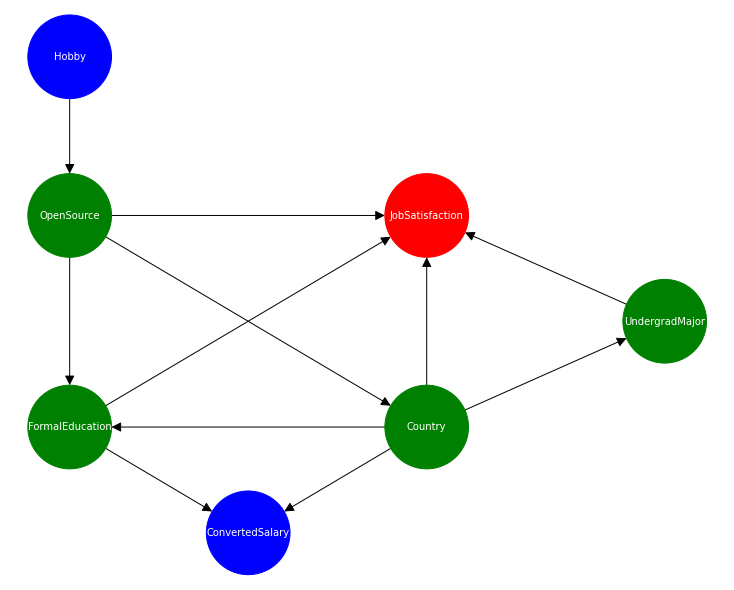

In [19]:
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ParameterEstimator, MaximumLikelihoodEstimator

model= BayesianNetwork(edges)
# pe = ParameterEstimator(model, data)
model.fit(data, estimator=MaximumLikelihoodEstimator)
for cpd in model.get_cpds():
    print(cpd)

model.get_independencies()

plot_mb(G, model.get_markov_blanket('JobSatisfaction'), 'JobSatisfaction')


# Markov Blanket Notes
"What the Markov Blanket says, is that all information about a random variable in a Bayesian network is contained within this set of nodes (parents, children, and parents of children). That is, if we observe ALL OF THESE variables, then our node is independent of all other nodes within the network."

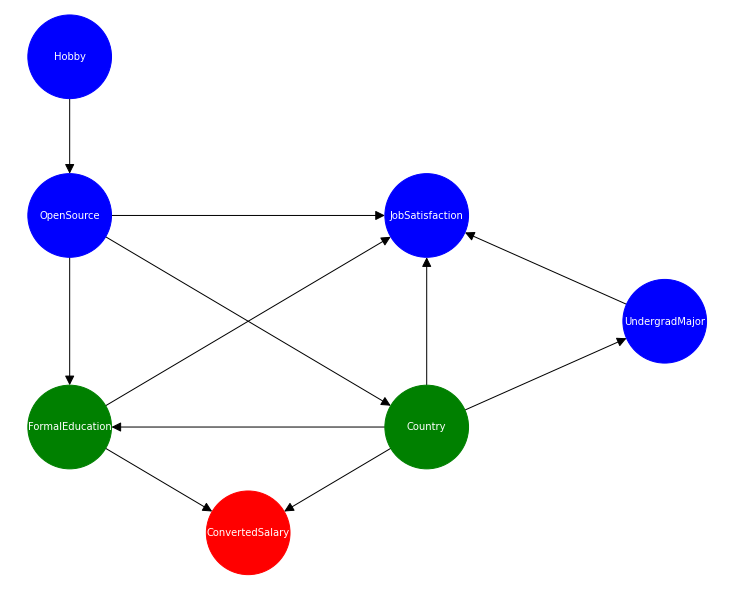

In [20]:
plot_mb(G, model.get_markov_blanket('ConvertedSalary'), 'ConvertedSalary')

As we can see asking the BN the probability of having a certain Converted Salary given its Markov Blanket is the same as adding evidence to other nodes that aren't part of it.
This means that Converted Salary is independent to other nodes.

In [21]:
from pgmpy.inference import VariableElimination
inference = VariableElimination(model)

pSalary1 = inference.query(['ConvertedSalary'],{'Country':'India','FormalEducation':'Bachelor'})
print(pSalary1)
print("P(ConvertedSalary | Country=India, FormalEducation=Bachelor)")
pSalary2 = inference.query(['ConvertedSalary'],{'Country':'India','FormalEducation':'Bachelor','OpenSource':'Yes'})
print(pSalary2)
print("P(ConvertedSalary | Country=India, FormalEducation=Bachelor, OpenSource=Yes)")

Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]


+------------------------------------+------------------------+
| ConvertedSalary                    |   phi(ConvertedSalary) |
+====================================+========================+
| ConvertedSalary(0-250.000)         |                 0.9836 |
+------------------------------------+------------------------+
| ConvertedSalary(1.000.000+)        |                 0.0008 |
+------------------------------------+------------------------+
| ConvertedSalary(250.000-1.000.000) |                 0.0156 |
+------------------------------------+------------------------+
P(ConvertedSalary | Country=India, FormalEducation=Bachelor)


Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]

+------------------------------------+------------------------+
| ConvertedSalary                    |   phi(ConvertedSalary) |
+====================================+========================+
| ConvertedSalary(0-250.000)         |                 0.9836 |
+------------------------------------+------------------------+
| ConvertedSalary(1.000.000+)        |                 0.0008 |
+------------------------------------+------------------------+
| ConvertedSalary(250.000-1.000.000) |                 0.0156 |
+------------------------------------+------------------------+
P(ConvertedSalary | Country=India, FormalEducation=Bachelor, OpenSource=Yes)


In [117]:
# Now switch to sampling methods
from pgmpy.factors.discrete import State
from pgmpy.sampling import BayesianModelSampling

def run_experiment(model,sample_size,evidence,p_exact):
    # Sample
    def prob_LW(samples,variable):
        result={}
        values=samples[variable].unique()
        for value in values:
            result[value]=round(np.sum(samples[samples[variable]==value]['_weight'])/np.sum(samples['_weight']),2)
        return result

    def prob_RS(samples,variable):
        result={}
        values=samples[variable].unique()
        tot=len(samples[variable])
        for value in values:
            result[value]=len(samples[samples[variable]==value])/tot
        return result

    def relative_error(exact_value,approx_value):
        return np.absolute((exact_value-approx_value)/exact_value)

    def absolute_error(exact_value,approx_value):

        return np.absolute(exact_value-approx_value)

    evidence2 = [State(key,val) for key,val in evidence.items()]
    inference_sampling=BayesianModelSampling(model)
    samples_LW = inference_sampling.likelihood_weighted_sample(evidence = evidence2, size=sample_size)
    samples_RS = inference_sampling.rejection_sample(evidence=evidence2, size=sample_size)
    
    # # Statistics  
    variables=[str(node) for node in model.nodes if str(node) not in evidence.keys()]
    p_LW={}
    p_RS={}
    absolute_error_LW={}
    absolute_error_RS={}
    
    for variable in variables:

        p_LW[variable]=prob_LW(samples_LW,variable)
        p_RS[variable]=prob_RS(samples_RS,variable)
        
        values=samples_LW[variable].unique()
        # exec('absolute_error_LW[variable]={value:absolute_error(p_exact[variable].get_value(%s=value),p_LW[variable][value]) for value in values}'%variable,locals())
        absolute_error_LW[variable]={value:absolute_error(p_exact[variable].get_value(**{variable:value}),p_LW[variable][value]) for value in values}
        
        values=samples_RS[variable].unique()
        # exec('absolute_error_RS[variable]={value:absolute_error(p_exact[variable].get_value(%s=value),p_RS[variable][value]) for value in values}'%variable,locals())
        absolute_error_RS[variable]={value:absolute_error(p_exact[variable].get_value(**{variable:value}),p_RS[variable][value]) for value in values}

    # Return results
    return p_exact,p_LW,p_RS,absolute_error_LW,absolute_error_RS



In [160]:
evidence = {'Country':'India','FormalEducation':'Bachelor'}

starting_size_=1 # from 10 sample points
final_size=5     # to 10^5 sample points
experiments=20 # 8 experiments
result=[]
inference_exact=VariableElimination(model)

variables=[str(node) for node in model.nodes if str(node) not in evidence.keys()]
p_exact={variable:inference_exact.query([variable],evidence) for variable in variables}

for size in np.logspace(starting_size_, final_size, num=experiments, dtype='<i8'):
    p_exact,p_LW,p_RS,absolute_error_LW,absolute_error_RS=run_experiment(model,size,evidence,p_exact)
    result.append({
        'sample_size':size,
        'p_exact':p_exact,
        'p_LW':p_LW,
        'p_RS':p_RS,
        'e_LW':absolute_error_LW,
        'e_RS':absolute_error_RS
    })

Eliminating: OpenSource: 100%|██████████| 3/3 [00:00<00:00, 375.02it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
Finding Elimination Order: : : 0it [00:00, ?it/s]
0it [00:00, ?it/s]
  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\tomma\Documents\Uni\Magistrale\pyvenvs\FAIKR_venv\lib\site-packages\pgmpy\sampling\Sampling.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled = sampled.append(_sampled).iloc[:size, :]
  0%|          | 0/10 [00:00<?, ?it/s]C:\Users\tomma\Documents\Uni\Magistrale\pyvenvs\FAIKR_venv\lib\site-packages\pgmpy\sampling\Sampling.py:227: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sampled = sampled.append(_sampled).iloc[:size, :]
  0%|          | 0/16 [00:00<?, ?it/s]C:\Users\tomma\Documents\Uni\Magistrale\pyvenvs\FAIKR_venv\lib\site-packages\pgmpy\sampl

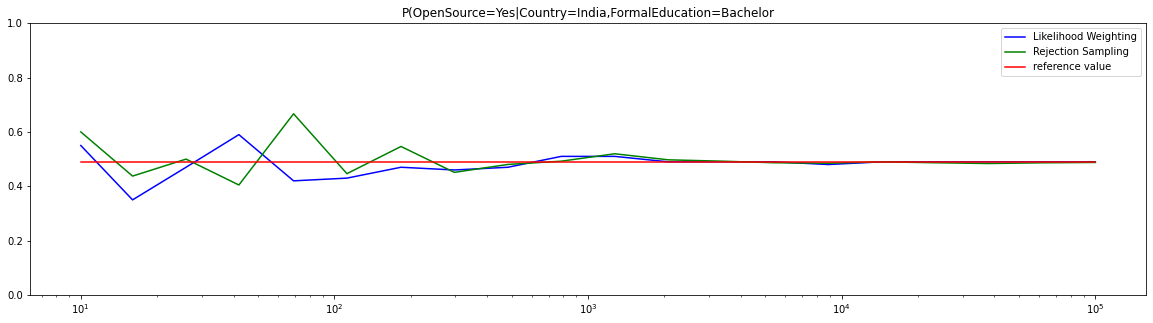

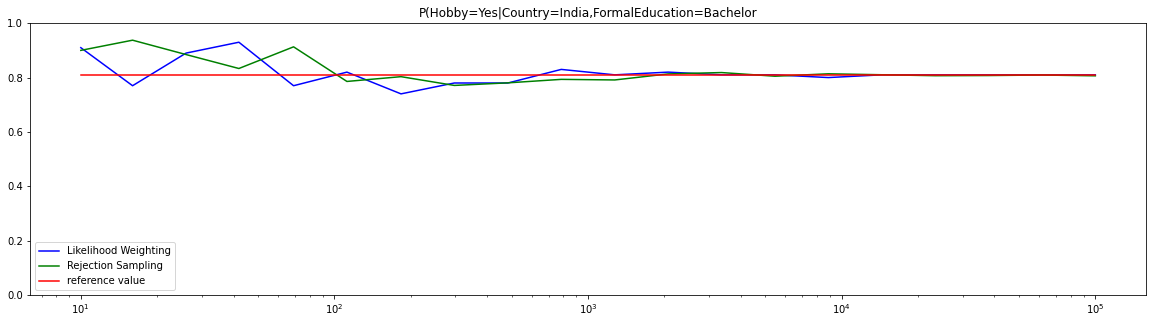

In [161]:
def plot_prob(results,p_exact,evidence,**variables):

    sample_size=[r['sample_size'] for r in results]
    
    for var,val in variables.items():
        p_LW=[r['p_LW'][var][val] for r in results]
        p_RS=[r['p_RS'][var][val] for r in results]
        p=p_exact[var].get_value(**{var:val})

        plt.figure(figsize=(20,5))
        plt.subplot()
        plt.ylim(0,1)
        plt.title('P({}={}|{}'.format(var,val,','.join([str(k)+"="+str(v) for k,v in evidence.items()])))
        LWCplot, = plt.semilogx(sample_size,p_LW,'b',label="Likelihood Weighting")
        RSCplot, = plt.semilogx(sample_size,p_RS,'g',label="Rejection Sampling")
        VECplot, = plt.semilogx(sample_size,p*np.ones(len(results)),'r',label="reference value")
        plt.legend(handles=[LWCplot,RSCplot,VECplot])
        plt.show()
plot_prob(result,p_exact,evidence,OpenSource='Yes',Hobby='Yes')

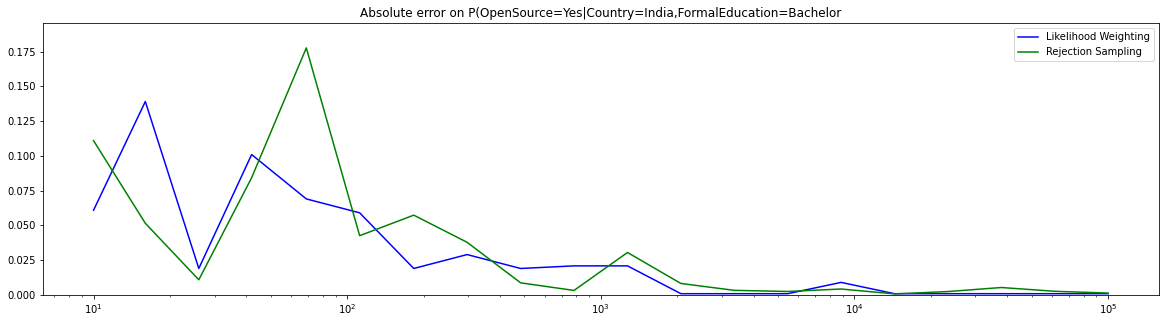

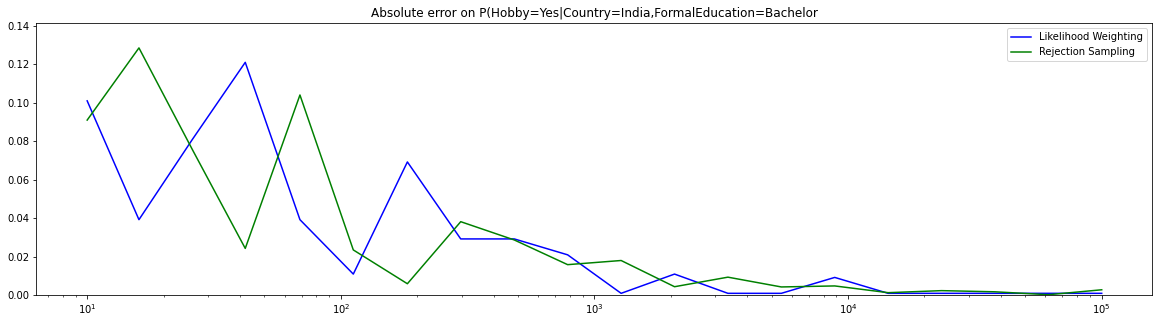

In [166]:
def plot_error(results,p_exact,evidence,**variables):
    # evidence=p_exact['Hobby'].get_evidence()
    # print(evidence)
    sample_size=[r['sample_size'] for r in results]
    
    for var,val in variables.items():
        e_LW=[r['e_LW'][var][val] for r in results]
        e_RS=[r['e_RS'][var][val] for r in results]

        plt.figure(figsize=(20,5))
        plt.subplot()
        plt.ylim(0,np.max(e_LW+e_RS)+0.1*np.max(e_LW+e_RS))
        plt.title('Absolute error on P({}={}|{}'.format(var,val,','.join([str(k)+"="+str(v) for k,v in evidence.items()])))
        LWCplot, = plt.semilogx(sample_size,e_LW,'b',label="Likelihood Weighting")
        RSCplot, = plt.semilogx(sample_size,e_RS,'g',label="Rejection Sampling")
        plt.legend(handles=[LWCplot,RSCplot])
        plt.show()
        
plot_error(result,p_exact,evidence,OpenSource='Yes',Hobby='Yes')